# Lending Club Case Study

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


In [160]:
# Importing all the necessary libraries for this case study

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Understanding & Reading Data Set

In [161]:
# Reading the dataset and displaying the first five rows

ln = pd.read_csv("loan.csv")
ln.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [162]:
# Display the number of rows and columns
ln.shape

(39717, 111)

#### Data Cleaning and Filling Missing values

Dropping unwanted Rows, Columns and replacing null values with most appropriate values 

In [163]:
# checking for columns that have null-values with the count using isnull & sum function
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [164]:
# Dropping all the columns which dont have a single value

print("Shape of the loan dataset before droping null value columns")
print(ln.shape)
ln.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=True)
print("Shape of the loan dataset after droping null value columns")
print(ln.shape)

Shape of the loan dataset before droping null value columns
(39717, 111)
Shape of the loan dataset after droping null value columns
(39717, 57)


In [165]:
# Observation : There are close to 54 columns doesnt have any values.  
# These columns will not be used even if we fill with some random values.  
# Dropping them wont affect the analysis of the dataset and dropped all those columns


In [166]:
# check for columns which having null-values again after first level of clean-up
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [167]:
#Checking for Null values for emp_length, emp_title fields and dropping those rows

print("Number of the rows before dropping the rows for emp_length and emp_title ")
print(ln.shape)

ln = ln[~ln.emp_length.isnull()]
ln = ln[~ln.emp_title.isnull()]

# Drop all the rows with empty emp_length and emp_title
print("Shape after droping null rows for emp_length and emp_title")
print(ln.shape)

Number of the rows before dropping the rows for emp_length and emp_title 
(39717, 57)
Shape after droping null rows for emp_length and emp_title
(37202, 57)


In [168]:
#Title column has some null values, dropping them to clean up the Title column

print("Shape of the dataset before droping null rows for title ")
print(ln.shape)

ln = ln[~ln.title.isnull()]

print("Shape of the dataset after droping null rows for title")
print(ln.shape)

Shape of the dataset before droping null rows for title 
(37202, 57)
Shape of the dataset after droping null rows for title
(37193, 57)


In [169]:
# check for columns which having null-values and also shows the count 
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12063
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [170]:
#Displaying the Desc field which has many null values
ln['desc']

1          Borrower added on 12/22/11 > I plan to use t...
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
5                                                      NaN
6          Borrower added on 12/18/11 > I am planning o...
                               ...                        
39710                                                  NaN
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 37193, dtype: object

In [171]:
# Desc has the details of the borrower and which may not be used for the analysis and dropping the column
ln = ln.drop(['desc'], axis = 1)
print("Shape of the dataset after desc column deleted")
print(ln.shape)

Shape of the dataset after desc column deleted
(37193, 56)


In [172]:
# mths_since_last_delinq,mths_since_last_record has many null values and the columns have many 0s in it and filling with 0.0
ln['mths_since_last_delinq'] = ln['mths_since_last_delinq'].fillna(0.0)
ln['mths_since_last_record'] = ln['mths_since_last_record'].fillna(0.0)

In [173]:
# check for columns which having null-values and also shows the count
ln.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [174]:
# Check for revol_util column and removing % at last and giving 

ln['revol_util']
ln['revol_util'] = ln['revol_util'].str.rstrip('%')

# Close to 883 rows with 0s - remove those rows with null values 
ln = ln[~ln.revol_util.isnull()]

In [175]:
# The column last_pymnt_d have some missing dates - dropping the rows which are having empty values
ln['last_pymnt_d']
ln = ln[~ln.last_pymnt_d.isnull()]

print("Dataset Size after removing the last_pymnt_d column")
print(ln.shape)

# The column next_pymnt_d has missing dates - dropping the rows which are having empty values

ln['next_pymnt_d']
ln = ln.drop(['next_pymnt_d'], axis = 1)

print("Dataset Size after dropping next_pymnt_d column")
print(ln.shape)

Dataset Size after removing the last_pymnt_d column
(37087, 56)
Dataset Size after dropping next_pymnt_d column
(37087, 55)


In [176]:
#check for zip_code and dropping the column.

ln['zip_code']
ln = ln.drop(['zip_code'], axis = 1)
print("Dataset Size after dropping the zip_code column")
print(ln.shape)

Dataset Size after dropping the zip_code column
(37087, 54)


In [177]:
#Analysing collections_12_mths_ex_med column - many values has 0.0 and filling the null with the common value 0.0

ln['collections_12_mths_ex_med'].value_counts()
ln['collections_12_mths_ex_med'] = ln['collections_12_mths_ex_med'].fillna(0.0)

#Analysing chargeoff_within_12_mths column - many values has 0.0 and filling the null with the common value 0.0
ln['chargeoff_within_12_mths'].value_counts()
ln['chargeoff_within_12_mths'] = ln['chargeoff_within_12_mths'].fillna(0.0)

#Analysing tax_liens column - many values has 0.0 and filling the null with the common value 0.0
ln['tax_liens'].value_counts()
ln['tax_liens'] = ln['tax_liens'].fillna(0.0)

#Analysing pub_rec_bankruptcies column - many values has 0.0 and filling the null with the common value 0.0
ln['pub_rec_bankruptcies'].value_counts()
ln['pub_rec_bankruptcies'] = ln['pub_rec_bankruptcies'].fillna(0.0)

In [178]:
# Analysing the pub_rec_bankruptcies column for Mean, Quantiles
ln['pub_rec_bankruptcies'].describe()

count    37087.000000
mean         0.040688
std          0.198522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [179]:
# check for columns which having null-values and also shows the count
ln.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [180]:
#Checking the columns which are objects and that needs to be converted to numeric values
ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37087 entries, 1 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37087 non-null  int64  
 1   member_id                   37087 non-null  int64  
 2   loan_amnt                   37087 non-null  int64  
 3   funded_amnt                 37087 non-null  int64  
 4   funded_amnt_inv             37087 non-null  float64
 5   term                        37087 non-null  object 
 6   int_rate                    37087 non-null  object 
 7   installment                 37087 non-null  float64
 8   grade                       37087 non-null  object 
 9   sub_grade                   37087 non-null  object 
 10  emp_title                   37087 non-null  object 
 11  emp_length                  37087 non-null  object 
 12  home_ownership              37087 non-null  object 
 13  annual_inc                  370

In [181]:
# The column int_rate has % at the end and removing them and converting the object value to numeric
ln['int_rate']
ln['int_rate'] = ln['int_rate'].str.rstrip('%')
ln.int_rate = ln.int_rate.astype("float64")

In [182]:
# Check emp_length and using extract function take the numerical value and convert into int
ln['emp_length']=ln.emp_length.str.extract('(\d+)')
ln.emp_length = ln.emp_length.astype("int64")

In [183]:
# Checking the emp_length after extracting and converting
print(ln.emp_length)

1         1
3        10
4         1
5         3
6         8
         ..
39710     1
39711     5
39712     4
39713     3
39716     1
Name: emp_length, Length: 37087, dtype: int64


In [184]:
# Checking the int_rate column after converting to numeric
print(ln.int_rate)

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 37087, dtype: float64


In [185]:
# Converting revol_util column to numeric value

ln.revol_util = ln.revol_util.astype("float64")
print(ln.revol_util)

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39710     0.6
39711    23.0
39712    13.1
39713    26.9
39716    51.5
Name: revol_util, Length: 37087, dtype: float64


In [186]:
# Analysing the Mean, SD and Quantile values for open_acc column
ln['open_acc'].describe()

count    37087.000000
mean         9.353089
std          4.392291
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

# Univariate analysis

count    3.708700e+04
mean     6.930844e+04
std      6.423179e+04
min      4.000000e+03
25%      4.167600e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


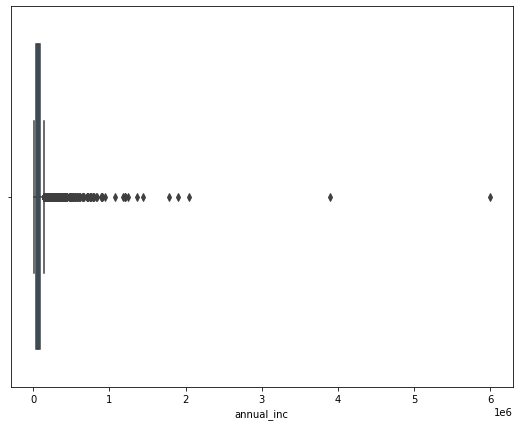

In [187]:
# Creating a box plot for the annual_inc column to analyse the outliers
print(ln['annual_inc'].describe())
plt.figure(figsize = [9,7])
sns.boxplot(ln.annual_inc)
plt.show()

In [188]:
#checking the annual_inc column to remove the outliers using quantile function
ln = ln[ln["annual_inc"] < ln["annual_inc"].quantile(0.98)]

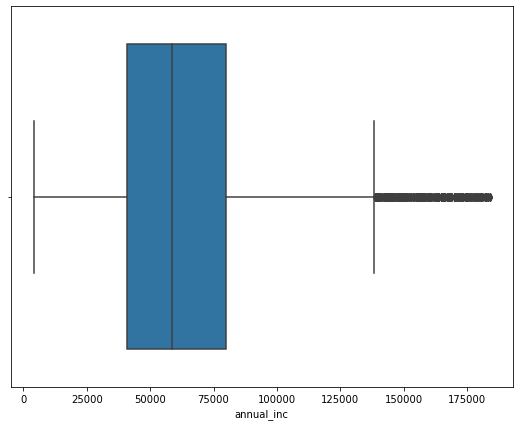

count     36345.000000
mean      64479.367855
std       31808.231020
min        4000.000000
25%       41000.000000
50%       58608.000000
75%       80000.000000
max      184000.000000
Name: annual_inc, dtype: float64

In [189]:
# Plotting a boxplot for the annual_inc to see the distribution range
plt.figure(figsize = [9,7])
sns.boxplot(ln.annual_inc)
plt.show()
ln['annual_inc'].describe()

Text(0.5, 1.0, 'Funded Amount Inv')

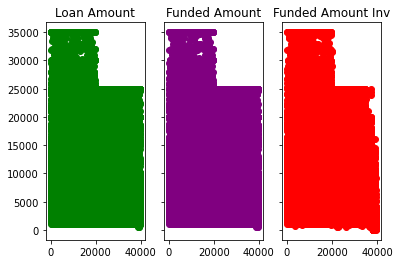

In [190]:
# Analysing the Loan_amt, Funded_amt and Funded_amnt_inv using a scatter plot
fig, ax = plt.subplots(ncols=3, sharey=True)

loan_amnt = ax[0].scatter(ln.index,ln.loan_amnt)
loan_amnt.set_label("Loan Amount")
loan_amnt.set_color("Green")
ax[0].set_title('Loan Amount')

funded_amnt = ax[1].scatter(ln.index,ln.funded_amnt)
funded_amnt.set_label("Funded Amount")
funded_amnt.set_color("purple")
ax[1].set_title('Funded Amount')

funded_amnt_inv = ax[2].scatter(ln.index,ln.funded_amnt_inv)
funded_amnt_inv.set_label("Funded Amount Inv")
funded_amnt_inv.set_color("red")
ax[2].set_title('Funded Amount Inv')

In [191]:
# Observation from the plot is Loan amount, Funded Amount and Funded Amount Inv are having a similar proportion 
# in the scatter plot 

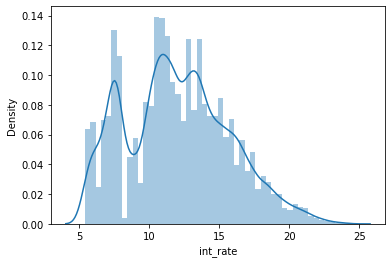

In [192]:
#Plotting Distplot to check rate of interest
sns.distplot(ln.int_rate)
plt.show()

Observation:The distplot show that most of the Interest Rates on loans are between 10% - 14%

# Bivariate analysis

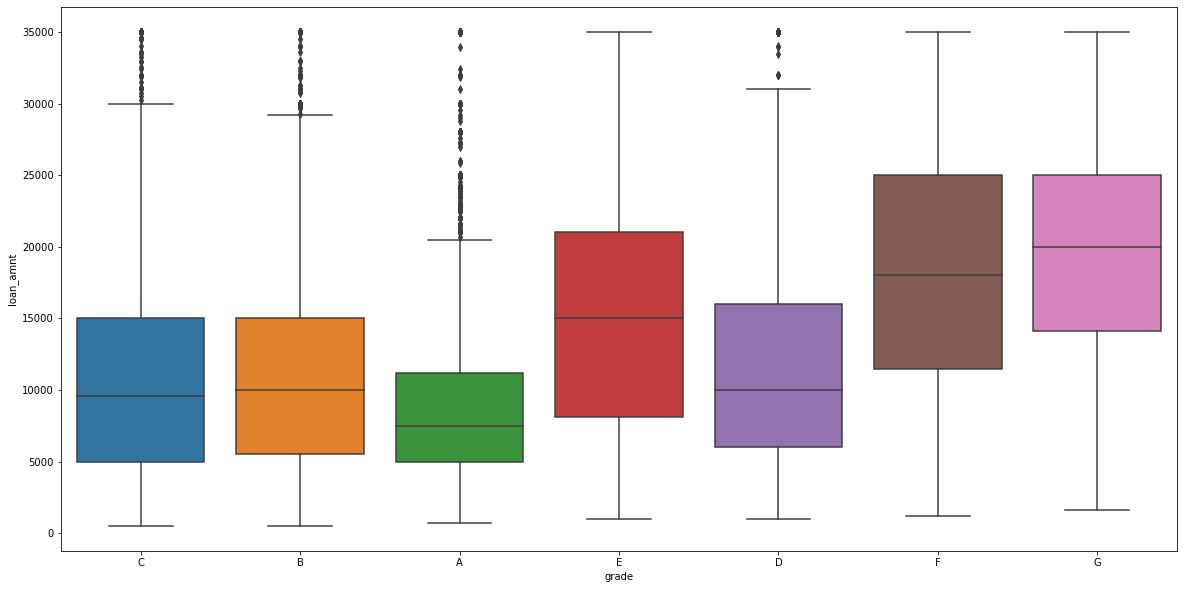

In [193]:
# Comparing the Grade and Loan Amount using boxplot

plt.figure(figsize = [20,10])
sns.boxplot(ln.grade,ln.loan_amnt)
plt.show()

Observation: The Grades A,B & C are having lesser loan amounts comparing to Grades F & G.  Grades F & G are taking higher loan amounts

In [194]:
# Deriving Charged-off ratio using the Charged Off values against the Total Values

ln_pur_loans = ln.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ln_pur_loans['Purpose Total'] = ln_pur_loans['Charged Off'] + ln_pur_loans['Current'] + ln_pur_loans['Fully Paid'] 
ln_pur_loans['Chargedoff_Ratio'] = ln_pur_loans['Charged Off'] / ln_pur_loans['Purpose Total']
ln_pur_loans.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Purpose Total,Chargedoff_Ratio
11,small_business,364.0,62.0,988.0,1414.0,0.257426
10,renewable_energy,14.0,1.0,68.0,83.0,0.168675
3,educational,47.0,0.0,240.0,287.0,0.163763
7,medical,96.0,10.0,517.0,623.0,0.154093
5,house,51.0,13.0,270.0,334.0,0.152695
9,other,547.0,111.0,2936.0,3594.0,0.152198
8,moving,80.0,6.0,442.0,528.0,0.151515
2,debt_consolidation,2535.0,550.0,14398.0,17483.0,0.144998
12,vacation,49.0,4.0,285.0,338.0,0.144970
4,home_improvement,294.0,85.0,2237.0,2616.0,0.112385


<function matplotlib.pyplot.show(close=None, block=None)>

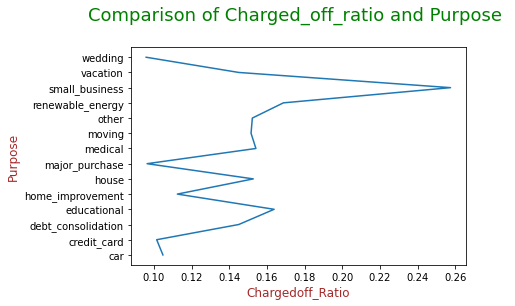

In [195]:
#Linechart depicts and compares both Purpose and Chargedoff_ratio
plt.plot(ln_pur_loans.Chargedoff_Ratio,ln_pur_loans.purpose)

# Adding and formatting title
plt.title("Comparison of Charged_off_ratio and Purpose \n", fontdict={'fontsize': 18, 'fontweight' : 6, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Chargedoff_Ratio", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )

plt.show

In [196]:
# Observation : From the above line graph we can find that Small Business category has the highest Ratio
# From this Small Business contributes to the higher loan amount 

### Multivariate analysis

<AxesSubplot:>

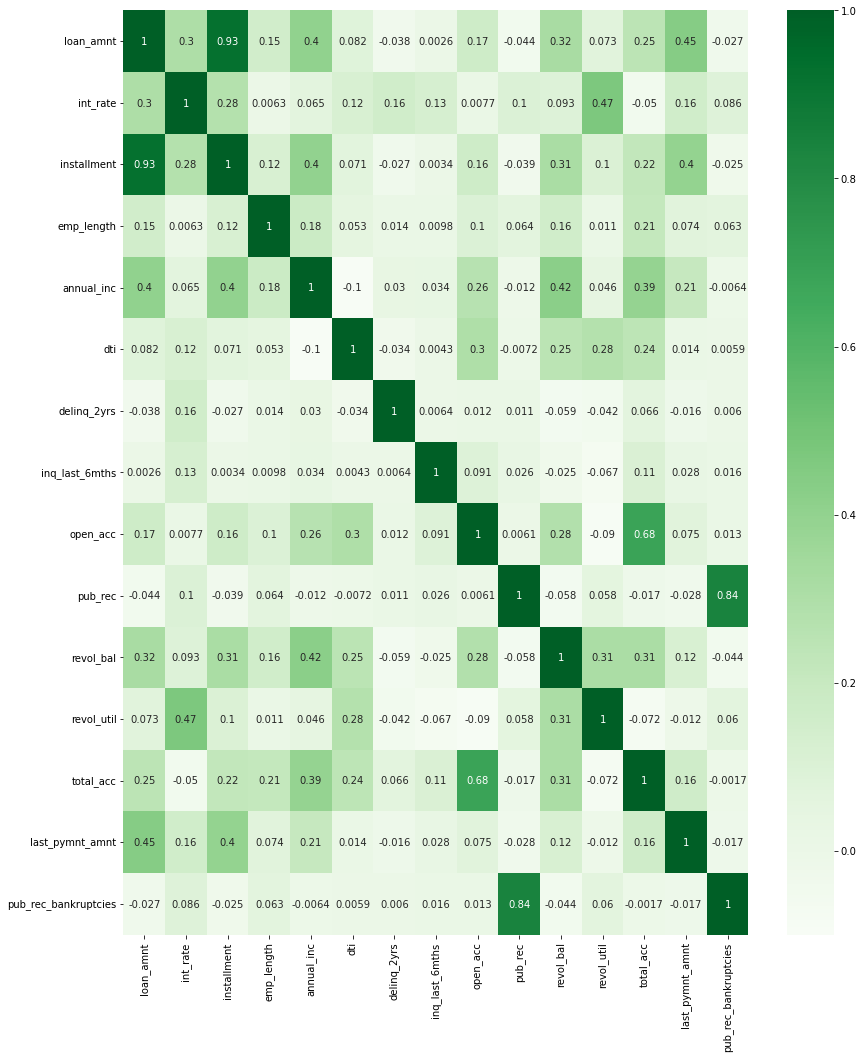

In [197]:
# Analysing different Target Variables and plotting a Correlation map for each of them using Heat Map
plt.figure(figsize=(14,17))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'last_pymnt_amnt', 'pub_rec_bankruptcies']
corr = ln[cont_var].corr()
sns.heatmap(corr, annot=True, cmap = "Greens", center=0.5)

In [198]:
# Observations :
# Loan Amount and Installments are positively correlated
# Pub_Rec and Pub_rec_bankruptcies are positively correlated
# Annual income and Debt income Ratio is negatively correlated
# Employee number of years experience and annual income are positively correlated